In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = np.asarray(pd.read_csv("/content/drive/MyDrive/hw08_data_set.csv", header = None))
N = dataset.shape[0]
K = 5

In [ ]:
#constructing B matrix

Dist = spa.distance_matrix(dataset, dataset)
Dist.shape

delta = 1.25
B = np.vstack([[1 if Dist[i][j]<delta and i!=j else 0 for i in range(N)] for j in range(N)])


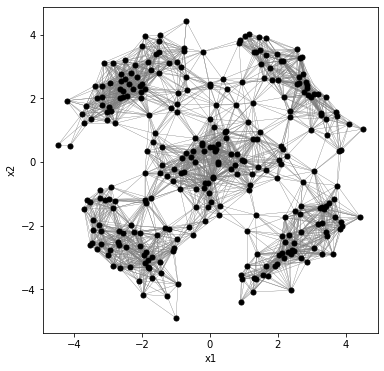

In [ ]:
plt.figure(figsize=(6, 6))

for i in range(N):
    for j in range(N):
        if B[i][j] == 1:
            plt.plot([dataset[i][0], dataset[j][0]], [dataset[i][1], dataset[j][1]], "gray", linewidth=0.2)

plt.plot(dataset[:, 0], dataset[:, 1], '.', markersize=10, color="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
#constructing D matrix
sums = np.sum(B, axis = 0)
I = np.eye(N,N)
D = np.vstack([I[i] * sums[i] for i in range(N)])


In [ ]:
#constructing symmetric L
D_inv_sqrt = np.sqrt(np.linalg.inv(D))

L = I - np.matmul(D_inv_sqrt, np.matmul(B, D_inv_sqrt))

eigenvals, eigenvectors = np.linalg.eig(L)

eigenvals_sorted = np.sort(eigenvals)
print(eigenvals_sorted[0:6])

R = 5
#finding the R smallest indices
indices = []
for i in range(N):
  for j in range(1,R+1): #since the first eigenvalue is 0
    if eigenvals[i] == eigenvals_sorted[j]:
      indices.append(i)
      print(eigenvals[i])

#constructing Z matrix
Z = np.hstack([np.transpose([eigenvectors[:,i]]) for i in indices])
Z.shape

[1.31838984e-16 1.06504411e-02 1.32880800e-02 2.16466872e-02
 4.69552183e-02 1.86445643e-01]
0.046955218300894996
0.021646687227641074
0.013288079956646307
0.010650441125425302
0.1864456425247763


(300, 5)

In [ ]:
random_rows = np.array([28, 142, 203, 270, 276])
initial_centroids = np.vstack([Z[i] for i in random_rows])
print(initial_centroids)

[[-0.05551091 -0.12747516 -0.03070096  0.00325886  0.03543487]
 [-0.06127445  0.02269928  0.11685073 -0.0342538  -0.00404365]
 [ 0.04717368  0.00024575  0.03876559 -0.01188869  0.01128642]
 [ 0.08546651 -0.00463725  0.03295704 -0.01512635  0.01848106]
 [ 0.07374296 -0.00332934  0.02155608  0.00092625  0.01282762]]


In [ ]:
#rest is taken from lab11 for K-means algorithm

def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = initial_centroids
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])

    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)

    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)

    return(memberships)

In [ ]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    plt.figure(figsize= (6,6))
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12,
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

In [ ]:
centroids = None
memberships = None
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break

    iteration = iteration + 1

Iteration#1:
Iteration#2:
Iteration#3:
Iteration#4:


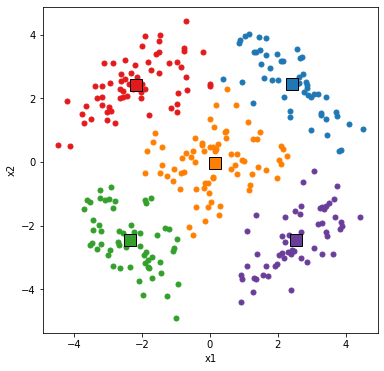

In [ ]:
centroids = np.vstack([np.mean(dataset[memberships == k,:], axis = 0) for k in range(K)])
plot_current_state(centroids, memberships, dataset)
plt.show()